# Jaccard Index

### Definition

The **Jaccard Index** is used for comparing the similarity and diversity of sample sets. In our contex, we define a variation of the Jaccard Index evaluated on **binary matrices**, i.e. collections of bits that represent real images. For example, here we have that the image on the left is associated to the binary matrix on the right. Black pixels are converted into $1$-bits, white pixels into $0$-bits.


<table>
<tr>
<td>

<img src="https://i.ibb.co/DfrB79S/Screenshot-2023-09-02-at-19-25-53.png" alt="Image" width="120"/>

</td>
<td>

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

</td>
</tr>
</table>

Given two binary matrices, $A$ and $B$, the Jaccard Index $J$ is computed as:

$$ J = \frac{I}{U} $$

Where:

- $I$ is the number of time a bit has value $1$ both in $A$ and in $B$.
- $U$ is the number of times a bit has value $1$ either in $A$ or in $B$.

### Interpretation

- A Jaccard Index of **1** means the two binary matrices are identical.
- A Jaccard Index of **0** means the two binary matrices have no $1$-bits in the same place.

### Examples

<table>
<tr>
<td>

$$A = 
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$
    
</td>
<td>

$$B = 
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

</td>
</tr>
</table>

The Jaccard Index for these two matrices is $1$, since $A$ and $B$ are the same.

<table>
<tr>
<td>

$$ A =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$
    
</td>
<td>

$$ B =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

</td>
</tr>
</table>

The Jaccard Index for these two matrices is $0$, since $A$ and $B$ have no $1$-bits in the same position.

<table>
<tr>
<td>

$$ A =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$
    
</td>
<td>

$$ B =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$
    
</td>
</tr>
</table>

The Jaccard Index for these two matrices is:   
    
$$ J = \frac{3}{4} = 0.75 $$    

# Import libraries

In [1]:
# Image and imread for manipulate and access the images.
from PIL import Image
from skimage.io import imread

# Numpy for manipulate, access and optimise operations on matrices and arrays.
import numpy as np

#Matplotlib.pyplot for plotting.
import matplotlib.pyplot as plt

# Define image_to_binary_matrix function

In this block of code we define the function **image_to_binary_matrix** to convert each image into a binary matrix.

In [2]:
def image_to_binary_matrix(image_path, threshold=128):
    # Load the image
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    grayscale_image = image.convert('L')
    
    # Convert the grayscale image to a numpy array
    image_array = np.array(grayscale_image)
    
    # Binarize the array. The threshold is on 128 as between white and black values.
    binary_array = (image_array < threshold).astype(int)
    
    return binary_array

# Produce the binary matrix for each image in the sample

In this block of code, we read the images from a file and we apply the function image_to_binary_matrix to the images.
We then store images and binary matrices into two lists.

In [3]:
#Name of the three samples images
all_samples = ["Circle", "Neuron", "Random"]

# List to store images and binary matrices for each sample
binary_matrices = []  
images=[]

# Loop to generate the binary matrix and plot both real and binary images for each sample
for sample in all_samples:
    image_path = "./" + sample + ".png"
    image = imread(image_path)
    
    #Generate the binary matrix from the image of each sample
    binary_matrix = image_to_binary_matrix(image_path)
    
    #Add the image and binary matrix of each sample to the list
    images.append(image)
    binary_matrices.append(binary_matrix)  


# Plot image and binary matrix for each sample

This is the code to produce the plot with images and binary matrices for all the 3 samples (circle, neuron, random).

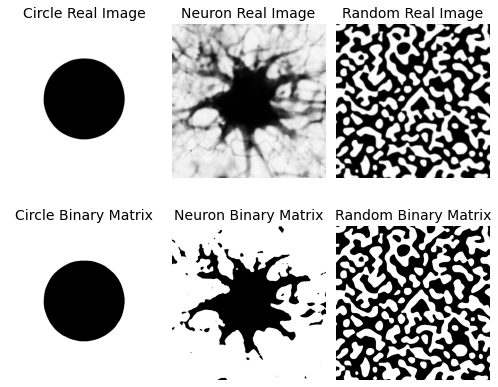

In [4]:
# Decide the number of subplots and the size of the figure
fig, axes = plt.subplots(2, len(all_samples), figsize=(7,6)) 

#Loop on number of samples to populate the subplots
id_sample=0
for index in range(len(all_samples)):
    
    ## First row of the subplots
    #Plot the image of the current sample
    axes[0, index].imshow(images[id_sample])
    #Plot the image title of the current sample
    axes[0, index].set_title(f'{all_samples[id_sample]} Real Image', fontsize=14)
    #Set axis of the image to off
    axes[0, index].axis('off')

    ## Second row of the subplots
    #Plot the binary matrix of the current sample
    axes[1, index].imshow(binary_matrices[id_sample], cmap='Greys')
    #Plot the binary matrix title of the current sample
    axes[1, index].set_title(f'{all_samples[id_sample]} Binary Matrix', fontsize=14)
    #Set axis of the binary matrix to off
    axes[1, index].axis('off')
    
    #Increase id_sample to go to the next sample and continue
    id_sample=id_sample+1
    
plt.tight_layout()
plt.show()

# Define jaccard_index function between two binary matrices

Each of the images has 878x878 pixels, with a total of around 770k pixels per image - so we need to optimise the 
operations on the binary matrices. We can do that using the library **numpy** while defining the **jaccard_index** function over two binary matrices.

In [10]:
def jaccard_index(binary_matrix_1, binary_matrix_2):
    # Convert matrices to numpy arrays
    mat1 = np.array(binary_matrix_1)
    mat2 = np.array(binary_matrix_2)
    
    # Calculate intersection and union
    intersection = np.logical_and(mat1, mat2).sum()
    union = np.logical_or(mat1, mat2).sum()
    
    # Avoid division by zero
    if union == 0:
        return 0  
    
    # Compute Jaccard index
    jaccard = intersection / union
    
    return jaccard

# Populate Jaccard Matrix

We now want to collect all the Jaccard index between all the possible pairs of images: 
neuron-circle, neuron-random, neuron-neuron and so on. We will collect all these information into a matrix,
that we call the **Jaccard Matrix**. We will show the results of the Jaccard Matrix in the next block of code.

In [6]:
# With np we can create a square matrix of zeros to store the Jaccard indices
jaccard_matrix = np.zeros((len(binary_matrices), len(binary_matrices)))
    
# Here we populate the Jaccard matrix with Jaccard index between all the pairs of samples
for row in range(len(binary_matrices)):
    for column in range(len(binary_matrices)):
        jaccard = jaccard_index(binary_matrices[column], binary_matrices[row])
        jaccard_matrix[column][row] = jaccard

# Plot the Jaccard matrix

This is the code to produce the visualisation of the Jaccard Matrix.

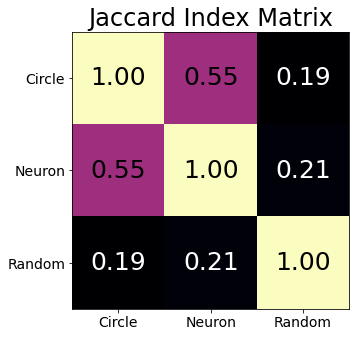

In [7]:
#Size of the plot
plt.figure(figsize=(5, 5))

#Show the jaccard matrix
plt.imshow(jaccard_matrix, cmap='magma', interpolation='nearest') 

#Style the x and y ticks
plt.xticks(range(len(all_samples)), all_samples, fontsize=14)
plt.yticks(range(len(all_samples)), all_samples, fontsize=14)

#Add the title
plt.title('Jaccard Index Matrix', fontsize=24)

#Style the values of jaccard index for each entry
for i in range(len(all_samples)):
    for j in range(len(all_samples)):
        plt.text(j, i, f"{jaccard_matrix[i][j]:.2f}",
                 ha='center', va='center', color='black' if jaccard_matrix[i][j] > 0.5 else 'white', 
                 fontsize=25)
plt.tight_layout()
plt.show()